In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

## Exploring the Data

In [2]:
file1 = pd.read_csv('abalone.csv')

In [3]:
def load_original_data():
    return pd.concat([file1])

In [4]:
aba=load_original_data()

In [5]:
aba

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
def lower_case_column_names(aba):
    aba.columns=[i.lower() for i in aba.columns]
    return aba

In [7]:
lower_case_column_names(aba)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
aba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
aba.isna().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

## no NAN values

In [10]:
aba.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
aba['height'].value_counts(0.00)

0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
        ... 
0.015      2
0.000      2
0.010      1
0.515      1
1.130      1
Name: height, Length: 51, dtype: int64

## Two 0.000 values for height

In [12]:
aba['age']=aba['rings']+1.5

In [13]:
aba['age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [14]:
aba.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [15]:
aba.rename(columns={'shucked weight':'shucked weight/ meat'}, inplace=True)

In [16]:
aba.rename(columns={'viscera weight':'gut weight'},inplace=True)

In [17]:
aba

,sex,length,diameter,height,whole weight,shucked weight/ meat,gut weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [18]:
aba.drop_duplicates()

,sex,length,diameter,height,whole weight,shucked weight/ meat,gut weight,shell weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


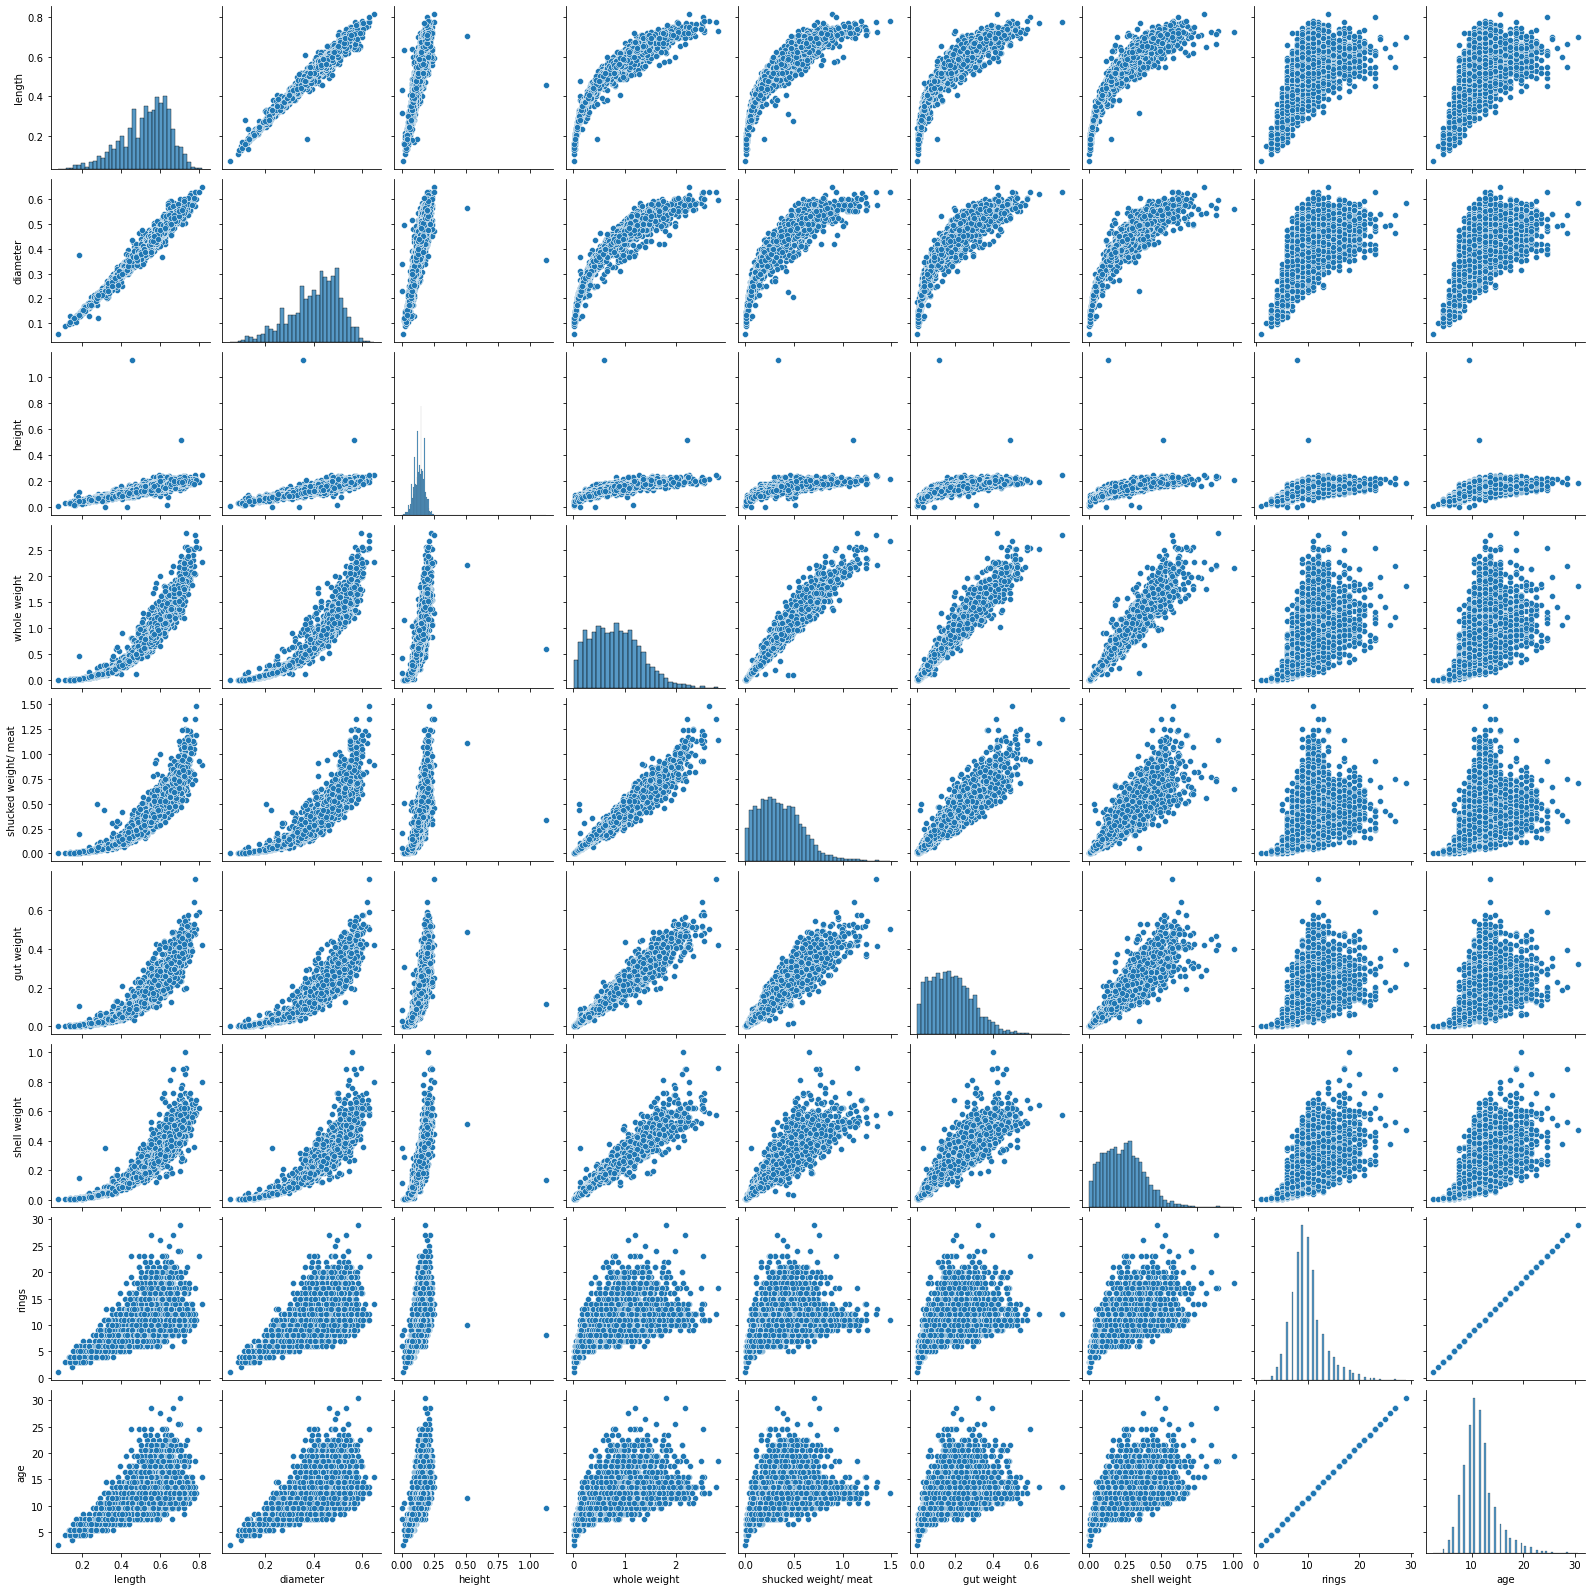

In [19]:
sns.pairplot(aba)

/Users/christinavonheydenaber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

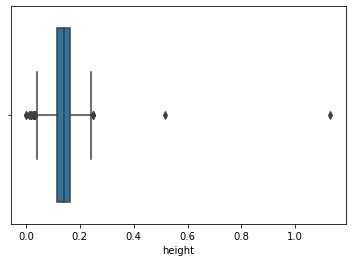

In [20]:
sns.boxplot('height', data=aba)

## Changing DM in CM for better reading

In [ ]:
aba[['length', 'diameter', 'height']]=aba[['length', 'diameter', 'height']]*10

## Changing KG in Gr for better reading

In [25]:
aba[['whole weight', 'shucked weight/ meat', 'gut weight', 'shell weight']]=aba[['whole weight', 'shucked weight/ meat', 'gut weight', 'shell weight']]*1000

In [27]:
aba.describe()

,length,diameter,height,whole weight,shucked weight/ meat,gut weight,shell weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,5.239921,4.078813,1.395164,828.742159,359.367489,180.593608,238.830859,9.933684,11.433684
std,1.200929,0.992399,0.418271,490.389018,221.962949,109.614250,139.202670,3.224169,3.224169
min,0.750000,0.550000,0.000000,2.000000,1.000000,0.500000,1.500000,1.000000,2.500000
25%,4.500000,3.500000,1.150000,441.500000,186.000000,93.500000,130.000000,8.000000,9.500000
50%,5.450000,4.250000,1.400000,799.500000,336.000000,171.000000,234.000000,9.000000,10.500000
75%,6.150000,4.800000,1.650000,1153.000000,502.000000,253.000000,329.000000,11.000000,12.500000
max,8.150000,6.500000,11.300000,2825.500000,1488.000000,760.000000,1005.000000,29.000000,30.500000


In [ ]:
***E